# 수치 미분

In [6]:
#나쁜 미분 구현의 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

# 문제점 1. 작은 수치인 10e-50 이 적절하지 않다. 너무 작아서 반올림오차 만듬. 10e-4 정도가 적절
# 문제점 2. x + h와 x의 위치는 엄밀히 다르다. 즉 x에서의 기울기를 말하는 것이 아니다.

In [8]:
#개선한 미분 구현 예

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

### 수치미분의 예

$ y = 0.01x^2 + 0.1x$

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

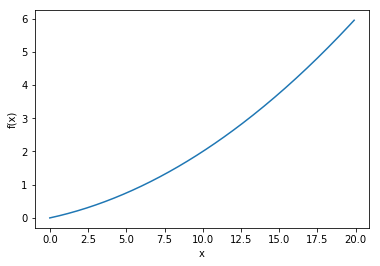

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [12]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


$ \frac{df(x)}{dx} = 0.02x + 0.1 $  

### 편미분

$ f(x_0, x_1) = x_0^2 + x_1^2 $  
$ \frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1} $

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2
# x는 array로 생각

In [15]:
#문제 1 x0 = 3, x1=4 일때 x0에 대한 편미분 구하기

def function_tmp1(x0):
    return x0*x0 + 4.0 **2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
#문제 2. x1에 대한 편미분 구하기

def function_tmp2(x1):
    return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4)

7.999999999999119

# 기울기  

$ (\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}) $ => 기울기

In [42]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        #print(1, ": ", x)
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        #print(2, ": ", x)
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        #print(3, ": ", grad)
        x[idx] = tmp_val # 굳이 필요 없어보인다.
        
    return grad

In [35]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

1 :  [3.0001 4.    ]
2 :  [2.9999 4.    ]
3 :  [6. 0.]
1 :  [3.     4.0001]
2 :  [3.     3.9999]
3 :  [6. 8.]


array([6., 8.])

In [36]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

1 :  [1.e-04 2.e+00]
2 :  [-1.e-04  2.e+00]
3 :  [0. 0.]
1 :  [0.     2.0001]
2 :  [0.     1.9999]
3 :  [0. 4.]


array([0., 4.])

In [37]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

1 :  [3.0001 0.    ]
2 :  [2.9999 0.    ]
3 :  [6. 0.]
1 :  [3.e+00 1.e-04]
2 :  [ 3.e+00 -1.e-04]
3 :  [6. 0.]


array([6., 0.])

### Gradient Descent Method

$ x_0 = x_0 - \eta\frac{\partial f}{\partial x_0} $  
$ x_1 = x_1 - \eta\frac{\partial f}{\partial x_1} $  
$ \eta $ = Learning rate

In [40]:
def gradient_descent(f, init_x, lr = 0.1, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [43]:

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num =100)

array([-6.11110793e-10,  8.14814391e-10])

In [44]:
#학습률이 너무 큰 경우

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10, step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [45]:
#학습률이 너무 작은 경우

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num =100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기  

$ W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end{pmatrix}$  

$ \frac{\partial L}{\partial W} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} \end{pmatrix} $  
$W$ 와 $\frac{\partial L}{\partial W}$ 의 모양은 같다

In [66]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
        
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
            
        return loss

In [58]:
net = simpleNet() #임의의 가중치 W
print(net.W)

[[-1.1247232   0.39363647  0.53855196]
 [ 1.01053696 -0.41213044 -0.02414289]]


In [68]:
x = np.array([0.6, 0.9]) #x값
p = net.predict(x)
print(p) 

#predict -> x값과 임의의 가중치 W를 dot product하여 구한 값, 1-1에 올라가는 모양이므로 가장높은게 정답으로 볼 수 있음
#다만 아직 softmax에 넣기 전이므로 확률을 뜻하진 않는다.

[ 0.23464934 -0.13473552  0.30140258]


In [62]:
np.argmax(p) # 최댓값 인덱스

2

In [63]:
t = np.array([0, 0, 1]) # 정답 레이블

In [64]:
net.loss(x, t)
#x값을 넣어 predict 하고, predict 결과를 softmax에 넣어 구한 각 확률값을 통해 cross_entropy_error를 구한다.

0.9485463901412042

In [67]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)
#Loss 함수에 대해 임의의 W의 미분값을 구한다.
#현재 상태에서는 W32가 가장 영향력이 크다고 볼 수 있다.

[[ 0.2173762   0.1502416  -0.3676178 ]
 [ 0.32606431  0.2253624  -0.55142671]]


In [70]:
#lamda로 구현하기
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.2173762 ,  0.1502416 , -0.3676178 ],
       [ 0.32606431,  0.2253624 , -0.55142671]])